### Data Preparation

#### 1. Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the provided datasets
file_paths = {
    'CO': 'Data/CO.csv',
    'NO2': 'Data/NO2.csv',
    'NOX': 'Data/NOX.csv',
    'O3': 'Data/O3.csv',
    'PM25': 'Data/PM25.csv',
    'PM10': 'Data/PM10.csv',
    'SO2': 'Data/SO2.csv'
}


#### 1.1 Data Cleaning

In [2]:
def clean_and_reformat(data_path):
    data = pd.read_csv(data_path)
    data = data.replace('N.A.', pd.NA).apply(pd.to_numeric, errors='ignore')
    data['DATE'] = pd.to_datetime(data['DATE'], dayfirst=False, errors='coerce')
    data['DATETIME'] = data['DATE'] + pd.to_timedelta(data['HOUR'] - 1, unit='h')
    data = data.drop(['DATE', 'HOUR', 'POLLUTANT'], axis=1).set_index('DATETIME')
    return data

# clean and reformat each dataset
datasets = {pollutant: clean_and_reformat(path) for pollutant, path in file_paths.items()}

# combine all datasets
all_data = pd.concat(datasets.values(), axis=1, keys=datasets.keys())

all_data.head()


CO                                                
                    SHATIN TSUEN WAN CENTRAL EASTERN KWUN TONG TUEN MUN   
DATETIME                                                                  
1990-01-01 00:00:00    NaN       NaN     NaN     NaN       NaN      NaN  \
1990-01-01 01:00:00    NaN       NaN     NaN     NaN       NaN      NaN   
1990-01-01 02:00:00    NaN       NaN     NaN     NaN       NaN      NaN   
1990-01-01 03:00:00    NaN       NaN     NaN     NaN       NaN      NaN   
1990-01-01 04:00:00    NaN       NaN     NaN     NaN       NaN      NaN   

                                                                ...       SO2   
                    TUNG CHUNG SHAM SHUI PO SOUTHERN YUEN LONG  ... YUEN LONG   
DATETIME                                                        ...             
1990-01-01 00:00:00        NaN          NaN      NaN       NaN  ...       NaN  \
1990-01-01 01:00:00        NaN          NaN      NaN       NaN  ...       NaN   
1990-01-01 02:00:00        NaN          NaN      NaN       NaN  ...       NaN   
1990-01-01 03:00:00        NaN          NaN      NaN       NaN  ...       NaN   
1990-01-01 04:00:00        NaN          NaN      NaN       NaN  ...       NaN   

                                                                             
                    CENTRAL/WESTERN NORTH KWAI CHUNG TAP MUN TSEUNG KWAN O   
DATETIME                                                                     
1990-01-01 00:00:00             NaN   NaN        NaN     NaN           NaN  \
1990-01-01 01:00:00             3.0   NaN       40.0     NaN           NaN   
1990-01-01 02:00:00             5.0   NaN       36.0     NaN           NaN   
1990-01-01 03:00:00             4.0   NaN       33.0     NaN           NaN   
1990-01-01 04:00:00             6.0   NaN       26.0     NaN           NaN   

                                                          
                    TAI PO MONG KOK CAUSEWAY BAY Average  
DATETIME                                                  
1990-01-01 00:00:00    NaN      NaN          NaN     NaN  
1990-01-01 01:00:00    NaN      NaN          NaN    12.6  
1990-01-01 02:00:00    NaN      NaN          NaN    12.2  
1990-01-01 03:00:00    NaN      NaN          NaN    11.0  
1990-01-01 04:00:00    NaN      NaN          NaN    10.6  

[5 rows x 133 columns]

In [3]:
# generate statistical summary for each pollutant
statistical_summary = all_data.describe()

# show 'CO' as an example
statistical_summary['CO']


,SHATIN,TSUEN WAN,CENTRAL,EASTERN,KWUN TONG,TUEN MUN,TUNG CHUNG,SHAM SHUI PO,SOUTHERN,YUEN LONG,CENTRAL/WESTERN,NORTH,KWAI CHUNG,TAP MUN,TSEUNG KWAN O,TAI PO,MONG KOK,CAUSEWAY BAY,Average
count,0.0,220821.000000,212909.000000,0.0,0.0,84554.000000,208964.000000,0.0,29397.000000,169249.000000,0.0,29439.000000,11036.000000,209610.000000,66016.000000,0.0,271375.000000,216131.000000,281514.000000
mean,NaN,71.981342,91.662325,NaN,NaN,67.557478,63.483763,NaN,42.053475,72.299228,NaN,49.387411,53.064697,62.035499,57.971658,NaN,107.890587,100.757883,89.467051
std,NaN,33.606701,45.396913,NaN,NaN,21.801282,35.420134,NaN,18.327175,33.748119,NaN,21.055335,28.775121,27.855397,25.997495,NaN,52.594349,49.709362,44.579376
min,NaN,0.000000,0.000000,NaN,NaN,9.000000,0.000000,NaN,0.000000,3.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
25%,NaN,49.000000,59.000000,NaN,NaN,53.000000,40.000000,NaN,28.000000,50.000000,NaN,34.000000,33.000000,44.000000,39.000000,NaN,71.000000,66.000000,60.666667
50%,NaN,69.000000,85.000000,NaN,NaN,65.000000,57.000000,NaN,41.000000,66.000000,NaN,47.000000,48.000000,58.000000,56.000000,NaN,97.000000,92.000000,79.000000
75%,NaN,91.000000,115.000000,NaN,NaN,80.000000,80.000000,NaN,54.000000,87.000000,NaN,61.000000,67.000000,77.000000,76.000000,NaN,133.000000,127.000000,105.600000
max,NaN,529.000000,518.000000,NaN,NaN,261.000000,573.000000,NaN,125.000000,434.000000,NaN,239.000000,761.000000,351.000000,217.000000,NaN,946.000000,552.000000,946.000000


In [4]:
# Check for missing data
missing_data_summary = all_data.isnull().mean().unstack(level=0).mul(100).round(2)
# display the percentage of missing data for each pollutant in each location
missing_data_summary

,CO,NO2,NOX,O3,PM25,PM10,SO2
SHATIN,100.00,16.26,16.26,25.19,66.55,14.45,7.89
TSUEN WAN,25.72,7.47,7.46,18.67,30.51,15.02,6.68
CENTRAL,28.38,28.17,28.17,62.52,30.12,29.74,28.18
EASTERN,100.00,30.69,100.00,30.69,63.87,28.74,30.69
KWUN TONG,100.00,6.70,6.69,27.11,63.68,16.38,5.95
TUEN MUN,71.56,71.78,71.78,71.72,72.08,72.08,71.68
TUNG CHUNG,29.71,29.96,29.97,29.87,29.48,29.17,30.40
SHAM SHUI PO,100.00,6.07,6.07,26.59,64.16,25.91,4.90
SOUTHERN,90.11,90.15,90.15,90.10,90.28,90.27,90.15
YUEN LONG,43.07,20.54,33.83,20.38,45.80,19.94,20.44


##### $CO$

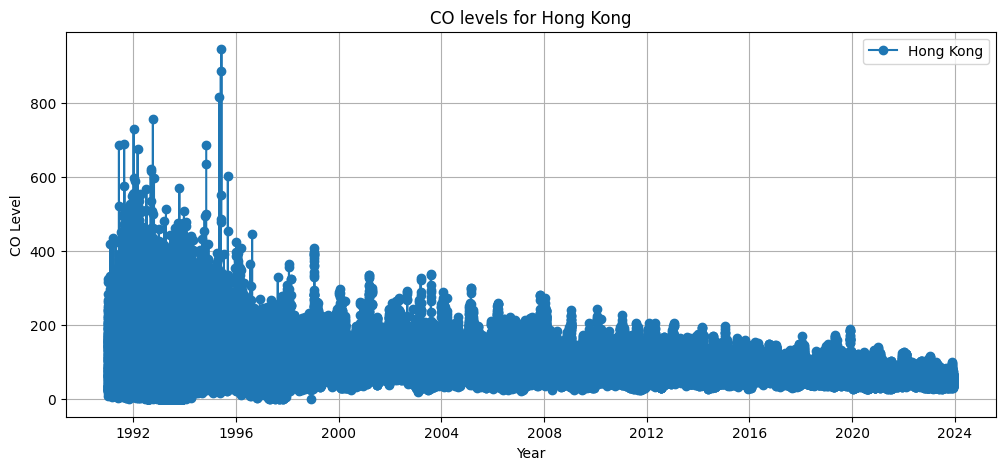

In [5]:
co_data = all_data['CO']
# plot the 'CO' data for each location
# def plot_co_continuous(data, location):
#     plt.figure(figsize=(12, 5))    
#     plt.plot(data.index, data[location], marker='o', linestyle='-', label=location)
#     plt.title(f'CO levels for {location}')
#     plt.xlabel('Year')
#     plt.ylabel('CO Level')
#     plt.legend()
#     plt.grid(True)   
#     plt.show()

#  
# for location in co_data.columns:
#     plot_co_continuous(co_data, location)

# plot the 'CO' data for the average level of all locations
def plot_co(data):
    plt.figure(figsize=(12, 5))  
    plt.plot(data.index, data['Average'], marker='o', linestyle='-', label='Hong Kong')
    plt.title('CO levels for Hong Kong')
    plt.xlabel('Year')
    plt.ylabel('CO Level')
    plt.legend()
    plt.grid(True)   
    plt.show()

 
plot_co(co_data)


##### $NO_2$

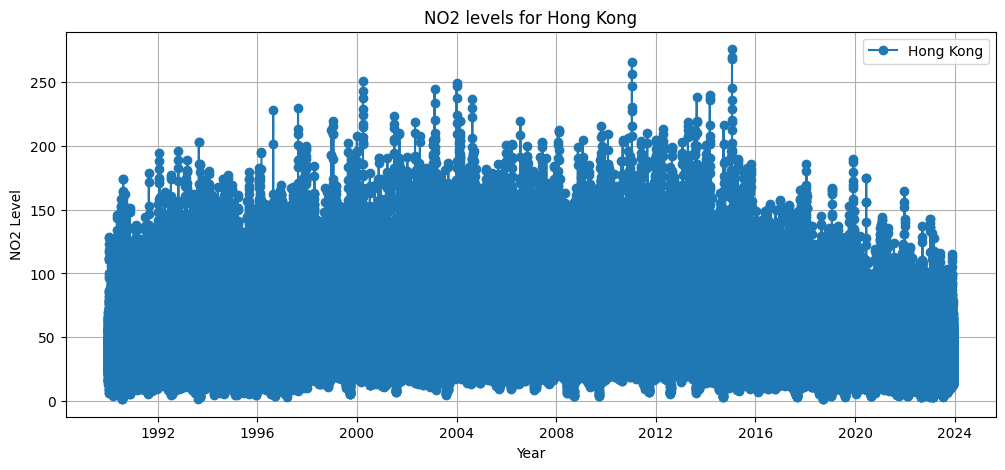

In [6]:
no2_data = all_data['NO2']
# plot the 'NO2' data 
# def plot_no2_continuous(data, location):
#     plt.figure(figsize=(12, 5))  # Set a larger figure size for better visibility
#     plt.plot(data.index, data[location], marker='o', linestyle='-', label=location)
#     plt.title(f'NO2 levels for {location}')
#     plt.xlabel('Year')
#     plt.ylabel('NO2 Level')
#     plt.legend()
#     plt.grid(True)   
#     plt.show()

#  
# for location in no2_data.columns:
#     plot_no2_continuous(no2_data, location)

# plot the 'NO2' data for the average level of all locations
def plot_no2(data):
    plt.figure(figsize=(12, 5))    
    plt.plot(data.index, data['Average'], marker='o', linestyle='-', label='Hong Kong')
    plt.title('NO2 levels for Hong Kong')
    plt.xlabel('Year')
    plt.ylabel('NO2 Level')
    plt.legend()
    plt.grid(True)   
    plt.show()

 
plot_no2(no2_data)



##### $NOX$

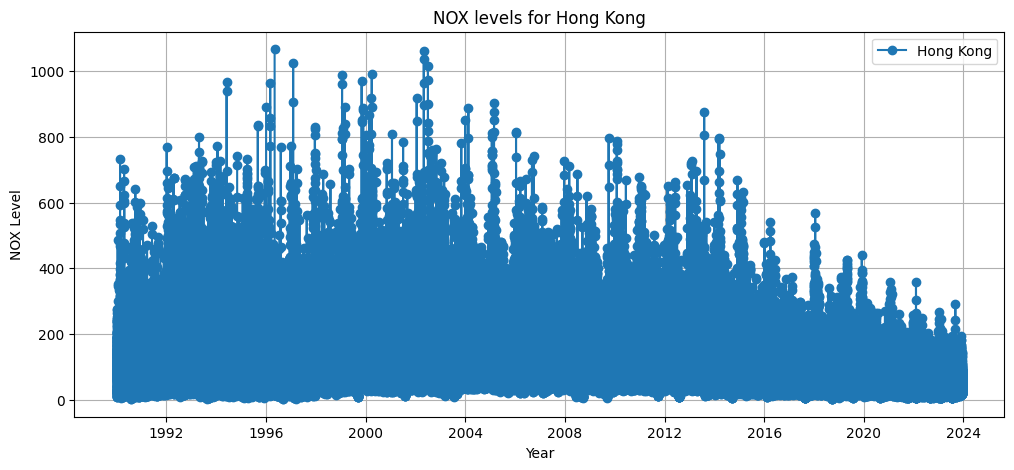

In [7]:
nox_data = all_data['NOX']
# # plot the 'NOX' data
# def plot_nox_continuous(data, location):
#     plt.figure(figsize=(12, 5))    
#     plt.plot(data.index, data[location], marker='o', linestyle='-', label=location)
#     plt.title(f'NOX levels for {location}')
#     plt.xlabel('Year')
#     plt.ylabel('NOX Level')
#     plt.legend()
#     plt.grid(True)   
#     plt.show()

#  
# for location in nox_data.columns:
#     plot_nox_continuous(nox_data, location)

def plot_nox(data):
    plt.figure(figsize=(12, 5))    
    plt.plot(data.index, data['Average'], marker='o', linestyle='-', label='Hong Kong')
    plt.title('NOX levels for Hong Kong')
    plt.xlabel('Year')
    plt.ylabel('NOX Level')
    plt.legend()
    plt.grid(True)   
    plt.show()

 
plot_nox(nox_data)



##### $O_3$

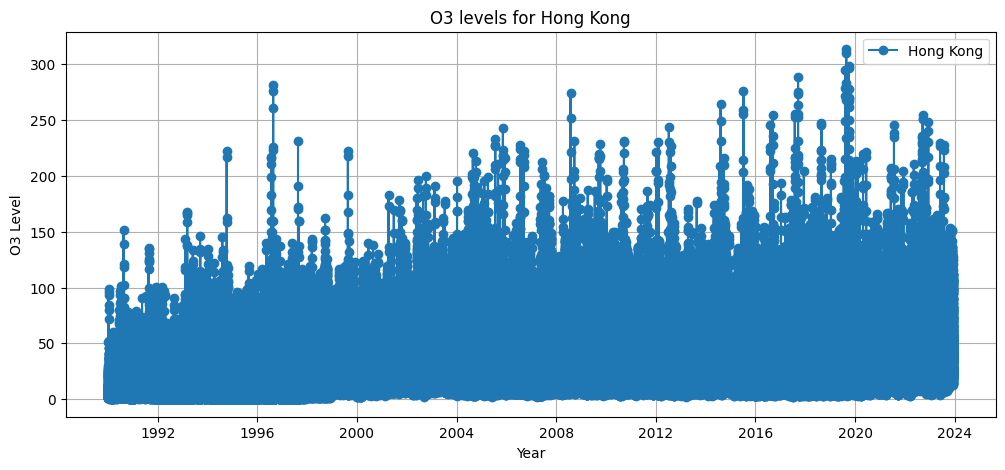

In [8]:
o3_data = all_data['O3']
# plot the 'O3' data
# def plot_o3_continuous(data, location):
#     plt.figure(figsize=(12, 5))    
#     plt.plot(data.index, data[location], marker='o', linestyle='-', label=location)
#     plt.title(f'O3 levels for {location}')
#     plt.xlabel('Year')
#     plt.ylabel('O3 Level')
#     plt.legend()
#     plt.grid(True)   
#     plt.show()

#  
# for location in o3_data.columns:
#     plot_o3_continuous(o3_data, location)

def plot_o3(data):
    plt.figure(figsize=(12, 5))    
    plt.plot(data.index, data['Average'], marker='o', linestyle='-', label='Hong Kong')
    plt.title('O3 levels for Hong Kong')
    plt.xlabel('Year')
    plt.ylabel('O3 Level')
    plt.legend()
    plt.grid(True)   
    plt.show()

 
plot_o3(o3_data)


##### $PM25$

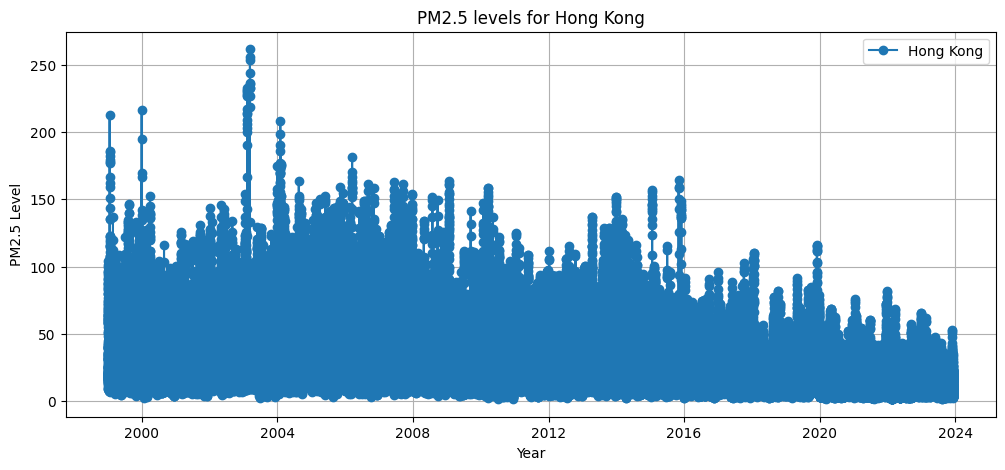

In [9]:
pm25_data = all_data['PM25']
# plot the 'PM2.5' data
# def plot_pm25_continuous(data, location):
#     plt.figure(figsize=(12, 5))    
#     plt.plot(data.index, data[location], marker='o', linestyle='-', label=location)
#     plt.title(f'PM2.5 levels for {location}')
#     plt.xlabel('Year')
#     plt.ylabel('PM2.5 Level')
#     plt.legend()
#     plt.grid(True) 
#     plt.show()

#  
# for location in pm25_data.columns:
#     plot_pm25_continuous(pm25_data, location)

def plot_pm25(data):
    plt.figure(figsize=(12, 5))    
    plt.plot(data.index, data['Average'], marker='o', linestyle='-', label='Hong Kong')
    plt.title('PM2.5 levels for Hong Kong')
    plt.xlabel('Year')
    plt.ylabel('PM2.5 Level')
    plt.legend()
    plt.grid(True) 
    plt.show()

 
plot_pm25(pm25_data)


##### $PM10$

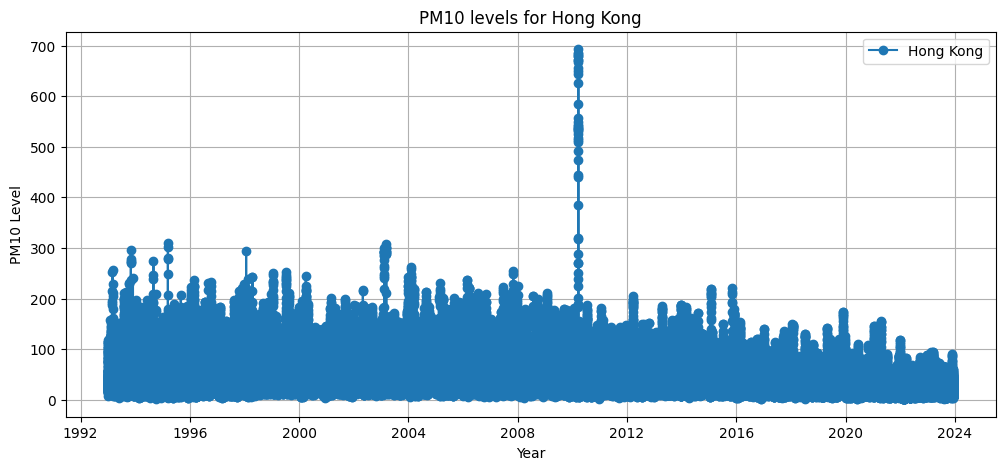

In [10]:
pm10_data = all_data['PM10']
# plot the 'PM10' data for each location
# def plot_pm10_continuous(data, location):
#     plt.figure(figsize=(12, 5))    
#     plt.plot(data.index, data[location], marker='o', linestyle='-', label=location)
#     plt.title(f'PM10 levels for {location}')
#     plt.xlabel('Year')
#     plt.ylabel('PM10 Level')
#     plt.legend()
#     plt.grid(True)   
#     plt.show()

#  
# for location in pm10_data.columns:
#     plot_pm10_continuous(pm10_data, location)

def plot_pm10(data):
    plt.figure(figsize=(12, 5))    
    plt.plot(data.index, data['Average'], marker='o', linestyle='-', label='Hong Kong')
    plt.title('PM10 levels for Hong Kong')
    plt.xlabel('Year')
    plt.ylabel('PM10 Level')
    plt.legend()
    plt.grid(True) 
    plt.show()

 
plot_pm10(pm10_data)

##### $SO_2$

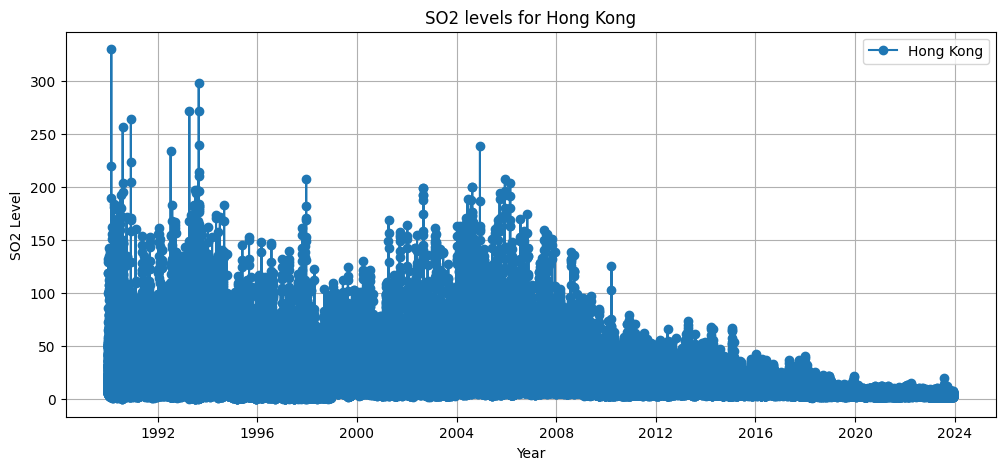

In [11]:
# Continuing from your existing code
so2_data = all_data['SO2']
# Now let's plot the 'SO2' data for each location with continuous values
# def plot_so2_continuous(data, location):
#     plt.figure(figsize=(12, 5))  # Set a larger figure size for better visibility
#     plt.plot(data.index, data[location], marker='o', linestyle='-', label=location)
#     plt.title(f'SO2 levels for {location}')
#     plt.xlabel('Year')
#     plt.ylabel('SO2 Level')
#     plt.legend()
#     plt.grid(True)   
#     plt.show()

#  
# for location in so2_data.columns:
#     plot_so2_continuous(so2_data, location)

def plot_so2(data):
    plt.figure(figsize=(12, 5))  # Set a larger figure size for better visibility
    plt.plot(data.index, data['Average'], marker='o', linestyle='-', label='Hong Kong')
    plt.title('SO2 levels for Hong Kong')
    plt.xlabel('Year')
    plt.ylabel('SO2 Level')
    plt.legend()
    plt.grid(True) 
    plt.show()

 
plot_so2(so2_data)


#### 2. Exploratory Data Analysis 